In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
%matplotlib inline
#imports

C:\Users\jd_ri\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
df = pd.read_csv("C:/Users/jd_ri/Desktop/Data Mining project/winemag-data-130k-v2.csv", nrows=10000)

In [7]:
df.head(10)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


## Letting uncessary fields go

In [8]:
df2 = df.drop(['taster_name','taster_twitter_handle','region_1','region_2','designation'],axis=1)

In [9]:
df2.head(10)

,country,description,points,price,province,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",87,16.0,Sicily & Sardinia,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,France,This dry and restrained wine offers spice in p...,87,24.0,Alsace,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,Germany,Savory dried thyme notes accent sunnier flavor...,87,12.0,Rheinhessen,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,France,This has great depth of flavor with its fresh ...,87,27.0,Alsace,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [10]:
df2.describe()

,points,price
count,10000.000000,9315.000000
mean,88.395700,35.511326
std,3.010752,44.298209
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,90.000000,42.000000
max,100.000000,1900.000000


In [11]:
df2.dtypes

country         object
description     object
points           int64
price          float64
province        object
title           object
variety         object
winery          object
dtype: object

### Looking at the count for price vs points signs of missing data can already be seen.

### <i>Looking for pesky outliers and missing data... </i>

<p>Before I started to plot graphs I decided to check for missing data.</p>

In [12]:
df2.apply(lambda x: sum(x.isnull()),axis=0)

country          5
description      0
points           0
price          685
province         5
title            0
variety          0
winery           0
dtype: int64

### <i> Droping the missing provinces and countries.</i>

In [13]:
df2.dropna(axis='rows',inplace=True)

In [14]:
df2['variety'].value_counts()

Pinot Noir                        972
Chardonnay                        846
Cabernet Sauvignon                766
Red Blend                         642
Bordeaux-style Red Blend          407
Sauvignon Blanc                   384
Riesling                          382
Syrah                             327
Merlot                            229
Malbec                            212
Zinfandel                         198
Nebbiolo                          194
Rosé                              190
Portuguese Red                    182
Sangiovese                        168
Sparkling Blend                   156
White Blend                       152
Tempranillo                       138
Cabernet Franc                    114
Rhône-style Red Blend             105
Grüner Veltliner                   97
Champagne Blend                    94
Viognier                           90
Portuguese White                   90
Gamay                              88
Pinot Gris                         83
Gewürztramin

In [15]:
df2.apply(lambda x: sum(x.isnull()),axis=0)

country        0
description    0
points         0
price          0
province       0
title          0
variety        0
winery         0
dtype: int64

In [16]:
 df2['price'].fillna(df['price'].mean(), inplace=True)

In [17]:
df2.apply(lambda x: sum(x.isnull()),axis=0)

country        0
description    0
points         0
price          0
province       0
title          0
variety        0
winery         0
dtype: int64

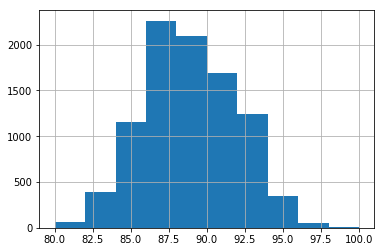

In [18]:
df2['points'].hist(bins=10)

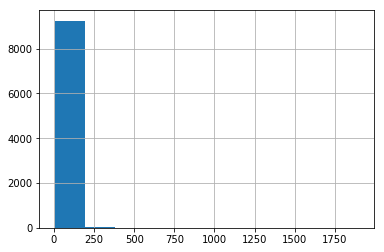

In [19]:
df2['price'].hist(bins=10)

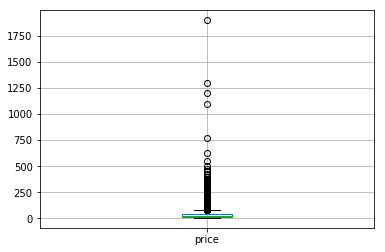

In [20]:
df2.boxplot(column='price')

# Compare Algorithms

In [21]:
array =  df2.values

In [22]:
X = array[:,0:7]
Y = array[:,6]

In [23]:
# prepare configuration for cross validation test harness
seed = 6

In [24]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [25]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ValueError: could not convert string to float: 'Pinot Noir'

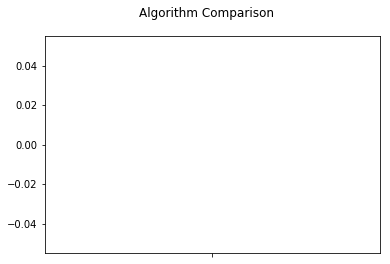

In [26]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# DECISION TREE ALGORITHM

# Data Slicing

In [27]:
print ("Dataset Lenght:: ", len(df2))
print ("Dataset Shape:: ", df2.shape)

Dataset Lenght::  9311
Dataset Shape::  (9311, 8)


# Encode Table into Numbers

In [28]:
for column in df2.columns:
    if df2[column].dtype == type(object):
        le = LabelEncoder()
        df2[column] = le.fit_transform(df2[column])

In [29]:
print ("Dataset:: ")
df2.head()

Dataset:: 


,country,description,points,price,province,title,variety,winery
1,27,7703,87,15.0,56,6887,206,3870
2,34,5843,87,14.0,134,6932,198,3891
3,34,4683,87,13.0,108,7808,224,4357
4,34,4308,87,65.0,134,7975,201,4445
5,32,1678,87,15.0,130,8036,277,4471


In [31]:
X = df2.values[:, 1:7]
Y = df2.values[:,0]

In [1]:
print(X)


NameError: name 'X' is not defined

In [2]:
print(Y)

NameError: name 'Y' is not defined

In [3]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.5, random_state = 100)


NameError: name 'train_test_split' is not defined

In [4]:
df2.dtypes

NameError: name 'df2' is not defined

# *********************Criterion to determine the quality of split*************************

# Decision Tree Classifier with criterion gini index

In [36]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

# Display Decision Tree

In [174]:
with open("Wine_Tree.txt", "w") as f:
    f = tree.export_graphviz(clf_gini, out_file=f)

In [175]:
from IPython.display import Image
Image("./Wine_Tree.jpg")

# Decision Tree Classifier with criterion information gain

In [37]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

# Prediction

In [38]:
clf_gini.predict([[2759,    87,    13,    90,  4708,   184]])

array([ 34.])

In [39]:
y_pred = clf_gini.predict(X_test)
y_pred

array([ 34.,  34.,  34., ...,  34.,  34.,  34.])

In [40]:
y_pred_en = clf_entropy.predict(X_test)
y_pred_en

array([ 34.,   7.,  34., ...,  34.,   7.,   7.])

# Accuracy for Decision Tree classifier with criterion as gini index

In [41]:
print ("Accuracy is ", accuracy_score(y_test,y_pred)*100)

Accuracy is  65.6572164948


# Accuracy for Decision Tree classifier with criterion as information gain

In [42]:
print ("Accuracy is ", accuracy_score(y_test,y_pred_en)*100)

Accuracy is  65.7216494845
